In [1]:
import pandas as pd
import numpy as np
import os
import pickle_funcs as pk
import helpers
from matplotlib import pyplot
import sqlite3
out_path = "C:/Users/dasen/Google Drive/SYNC TO PC/"
downloads = "C:/Users/dasen/Downloads/"

# Description

Exploration and setup of data for [kaggle project.](https://www.kaggle.com/c/zillow-prize-1/data)

I want to create a database for this project so that all data can be in a centralized location.

# Load Data

In [8]:
# load the transaction data 
query = """
    select parcelid, logerror, transactiondate from train
"""
df = helpers.query_database(query)
df.index = df.parcelid
del df['parcelid']
df['transactiondate'] = df.transactiondate.apply(pd.to_datetime)

# View distribution of logerror

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64


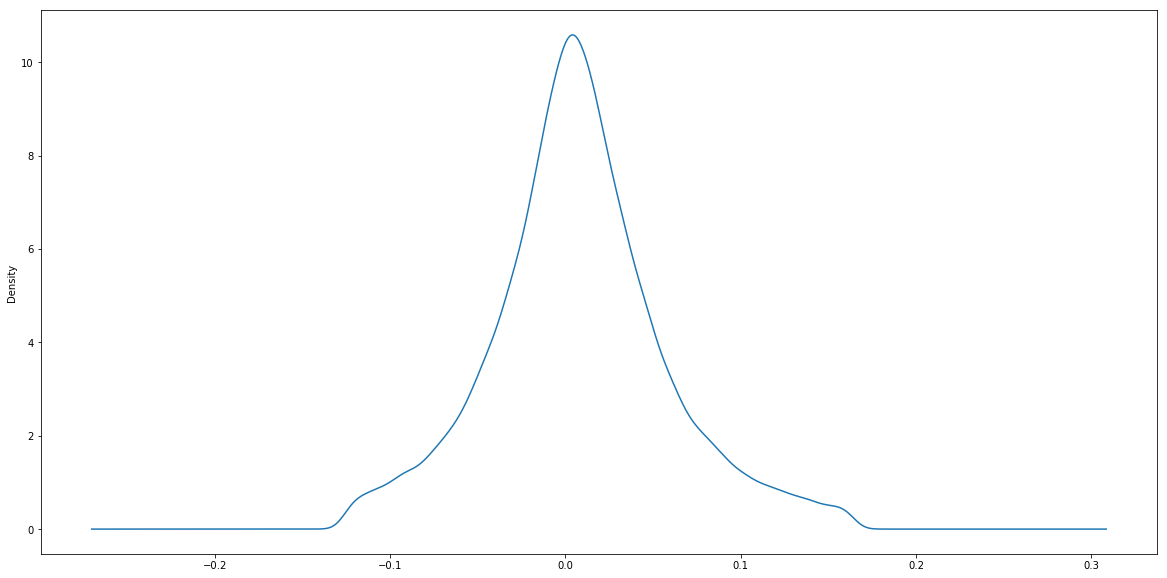

In [20]:
# view distribution of logerror
print(df.logerror.describe())
mask1 = (df.logerror < np.percentile(df.logerror, 95))
mask2 = (df.logerror > np.percentile(df.logerror, 5))
df[mask1 & mask2].logerror.plot(
    kind = 'density',
    figsize = (20, 10)
)
pyplot.show()

# Stuff

In [22]:
[x for x in helpers.view_table_cols('properties') if 'squarefeet' in x]

['finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'lotsizesquarefeet']

In [45]:
# load calculatd finished square feed from properties
query = """
    select parcelid, calculatedfinishedsquarefeet from properties
    where parcelid in (%s)
""" % str("'" + "', '".join([str(x) for x in list(df.index)]) + "'")
data = helpers.query_database(query)
data.index = data.parcelid
del data['parcelid']
df = df.join(data).copy()
del data

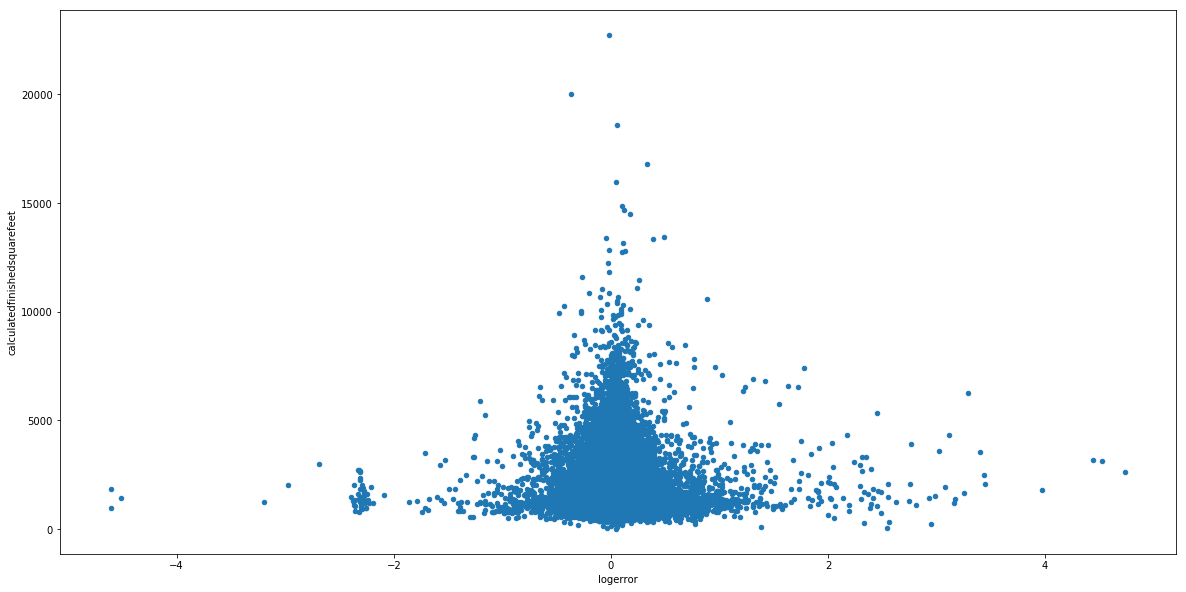

In [49]:
# compare logerror with calculatedfinished square feet
df.plot(
    kind = 'scatter',
    x = 'logerror', y = 'calculatedfinishedsquarefeet',
    figsize = (20, 10)
)
pyplot.show()